<a href="https://colab.research.google.com/github/kaushikRajGhimire/Data-Science-Masters-Certification/blob/main/Done_Research_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN, NB, LR, SVM, DT, RF, XGBOOST Modeling - Bank Marketing Dataset

In [1]:
# importing required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures


In [2]:
df=pd.read_csv('/content/modified_creditcard_dataset.csv')

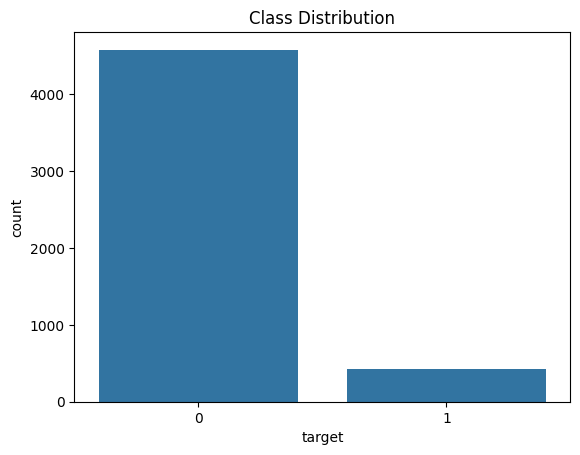

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='target', data=df)
plt.title('Class Distribution')
plt.show()


In [30]:
# Retrieve and count fraud labels
def retrieve_fraud_counts(df):
    # Change 'Class' to 'target' to access the correct column
    fraud_counts = df['target'].value_counts()
    print("Fraud Label Counts:")
    print(f"Non-Fraudulent (0): {fraud_counts.get(0, 0)}")
    print(f"Fraudulent (1): {fraud_counts.get(1, 0)}")
    return fraud_counts

# Call the function on your dataset
fraud_counts = retrieve_fraud_counts(df)  # Replace `credit_card_data` with your DataFrame name

Fraud Label Counts:
Non-Fraudulent (0): 4576
Fraudulent (1): 424


In [4]:
print(df.isnull().sum())


V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
target           0
interaction_1    0
interaction_2    0
dtype: int64


<Axes: >

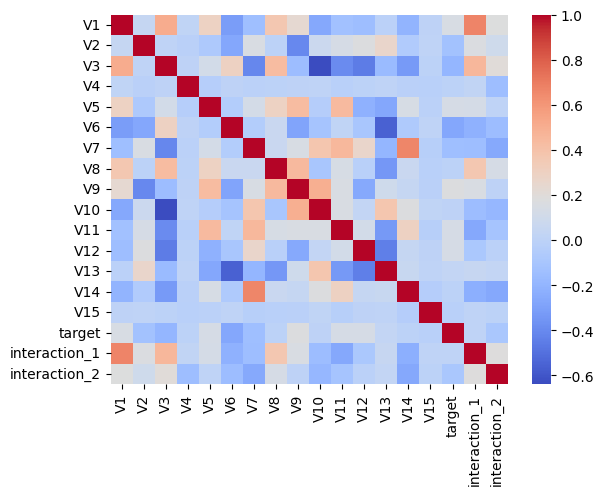

In [5]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)


<Axes: >

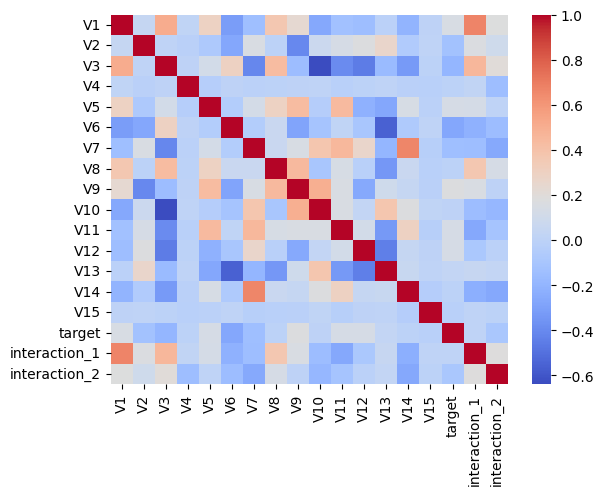

In [6]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)


In [7]:
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df = df.drop(columns=to_drop)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df.drop('target', axis=1)
y = df['target']

X_scaled = scaler.fit_transform(X)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


In [10]:
#dispaly first 5 rows
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,target,interaction_1,interaction_2
0,0.930252,3.023710,1.967521,-0.435048,-2.336934,-0.750723,-1.641160,-1.082204,-7.867705,-3.309662,3.444005,-2.777866,5.367986,1.983873,0.678547,1,2.812813,1.550022
1,1.314846,-0.015844,5.160556,-0.802606,-3.250515,1.858942,-0.614843,0.028836,-1.977344,-0.296161,-2.226908,-2.548149,2.204404,-1.439623,0.309723,0,-0.020833,2.441959
2,2.257469,3.148840,3.441710,-0.810140,-2.815431,-0.507367,0.386209,0.356446,-1.285135,1.193789,-2.284444,0.117761,2.221353,-4.585062,0.908142,0,7.108409,2.062002
3,-0.587868,-1.948571,-0.180012,-1.654516,-2.632962,1.120892,-1.587319,0.829171,5.707638,4.062424,-0.770456,-4.930509,7.628688,-0.828194,2.200709,1,1.145503,1.214292
4,0.983107,0.059312,-0.859291,-1.178573,2.740505,1.093674,4.019551,0.544246,1.658132,1.330345,2.607972,0.587026,-4.003532,3.386254,0.532210,0,0.058310,0.565051


In [11]:
df.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


**Notes :**
1. Algorithms like KNN, Naive bayes, Logistic Regression and SVM require Standardised Data
2. Tree based Algorithms are scale independant
3. standardisation basically subtracts mean and divides std deviation of column from each value

# Train Test Split

# Applying KNN

In [12]:
# trying different odd values of k for KNN and finding accuracy for them

knn = KNeighborsClassifier(n_neighbors=1)
accuracy_rate=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())
print(accuracy_rate)

[0.96175, 0.9694999999999998, 0.967, 0.9654999999999999, 0.96425, 0.96175, 0.96, 0.9574999999999999, 0.9557500000000001, 0.95475, 0.9532499999999999, 0.95275, 0.9522499999999999, 0.9529999999999997, 0.952, 0.9514999999999999, 0.95075, 0.9515, 0.9505000000000001, 0.9487499999999999]


Text(0, 0.5, 'Accuracy rate')

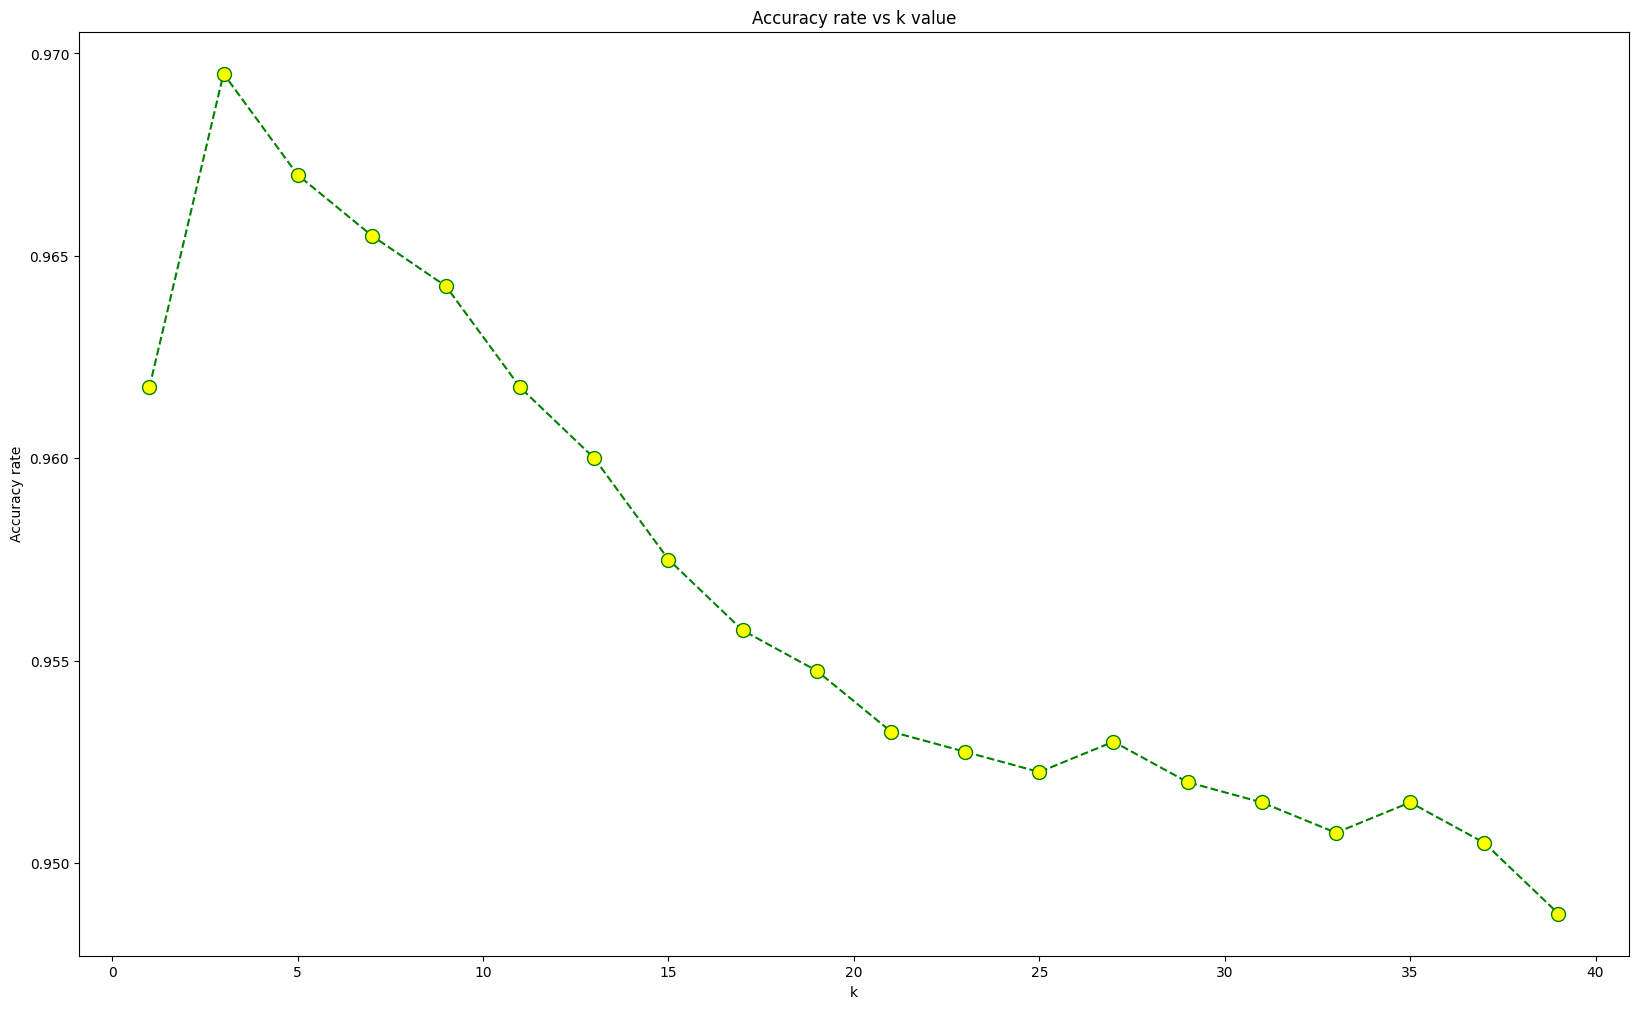

In [13]:
# plotting accuracy of KNN for every value of K. Accuracy is highest when K=9

plt.figure(figsize=(20,12))
plt.plot(range(1,40,2),accuracy_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')

In [14]:
!nvidia-smi


Wed Dec 18 16:42:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [15]:
#pip install --extra-index-url https://pypi.nvidia.com cuml-cu12

#KEEP CODING

**Notes:**
1. KNN gives accuracy of 0.74 which is not very good
2. There is not much difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.68 whihc is not very good

# Applying Logistics Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Initialize the Logistic Regression model
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Predict on the test data
y_pre_log = lr.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pre_log)
f1 = f1_score(y_test, y_pre_log)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
from sklearn.metrics import precision_score, recall_score

# ... (Your existing model training code) ...

# Get predictions for the test set
y_pred = lr.predict(X_test)

# Calculate precision and recall for the minority class (Class 1)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)

print(f"Precision for minority class: {precision}")
print(f"Recall for minority class: {recall}")

Accuracy: 0.956
F1 Score: 0.6764705882352942
Precision for minority class: 0.9019607843137255
Recall for minority class: 0.5411764705882353


**Notes:**
1. Naive Bayes gives accuracy of 0.70 which is not very good
2. There is very less difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.53 which is very poor

# Applying Logistic Regression

**Notes:**
1. Hyperparameters for Logistic Regression
2. Penalty indicates which regularization to use
3. C decides how much weightage is given to Regularization
4. Solver is the technique used internally
5. max_iter is the number of iterations for convergence

**Notes:**

1.  Logistic Regression gives accuracy of 0.81 which is fairly good
2.  There is very less difference between train and test accuracy so its not overfitting or underfitting
3.  Recall is 0.79 which is not very good


In [17]:
classifier = SVC(probability=True)
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'kernel':['rbf'], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]},
            {'C':[1,10,100,1000],'kernel': ['poly'], 'degree':[2,3,4]}      ]


In [18]:
from sklearn.svm import SVC
support_vector_classifier=SVC(kernel='rbf')# we use that in bydeafault parameter
support_vector_classifier.fit(X_train,y_train)

SVC()

In [19]:
y_pred = support_vector_classifier.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [20]:
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.97
F1 Score: 0.7887323943661971


**Notes:**
1. Support vector machines gives accuracy of 0.82 which is quite good
2. There is very less difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.89 which is very good

# Applying Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# Initialize Decision Tree with chosen parameters (without GridSearchCV)
dtc = DecisionTreeClassifier(
    criterion='gini',       # Example: Use 'gini' criterion
    max_depth=10,           # Example: Set max_depth to 10
    min_samples_leaf=2,     # Example: Set min_samples_leaf to 2
    min_samples_split=3     # Example: Set min_samples_split to 3
)

# Train the model on the training data
dtc.fit(X_train, y_train)

# Predict on the test data
y_pre_dis = dtc.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pre_dis)
f1 = f1_score(y_test, y_pre_dis)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Accuracy: 0.939
F1 Score: 0.5734265734265734


**Notes:**
1. Decision Tree gives accuracy of 0.81 which is quite good
2. There is very less difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.82 which is quite good

# Applying Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Initialize Random Forest with chosen parameters (without GridSearchCV)
rfc = RandomForestClassifier(
    n_estimators=500,       # Example: Set number of trees to 500
    criterion='gini',       # Example: Use 'gini' criterion
    max_features='sqrt',    # Changed 'auto' to 'sqrt'
    min_samples_leaf=2,     # Example: Set min_samples_leaf to 2
    min_samples_split=5,    # Example: Set min_samples_split to 5
    bootstrap=True          # Example: Use bootstrap sampling
)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Predict on the test data
y_pre_rn = rfc.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pre_rn)
f1 = f1_score(y_test, y_pre_rn)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.96
F1 Score: 0.696969696969697


**Notes:**
1. Random Forest gives accuracy of 0.84 which is quite good
2. There is quite difference between train and test accuracy but its not severe overfitting or underfitting
3. Recall is 0.88 which is very good

# Applying XGBoost

In [24]:
from xgboost import XGBClassifier

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# Initialize XGBoost with chosen parameters (without GridSearchCV)
XGB_Classifier = XGBClassifier(
    eta=0.2,                   # Example: Set eta (learning rate) to 0.2
    min_child_weight=2,        # Example: Set min_child_weight to 2
    gamma=5,                   # Example: Set gamma to 5
    subsample=0.8,             # Example: Set subsample to 0.8
    colsample_bytree=0.8       # Example: Set colsample_bytree to 0.8
)

# Train the model on the training data
XGB_Classifier.fit(X_train, y_train)

# Predict on the test data
y_pre_xgb = XGB_Classifier.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pre_xgb)
f1 = f1_score(y_test, y_pre_xgb)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Accuracy: 0.957
F1 Score: 0.6814814814814815


Accuracy: 0.945
F1 Score: 0.6153846153846154
Precision: 0.7586206896551724
Recall: 0.5176470588235295
ROC AUC: 0.8076438444230151


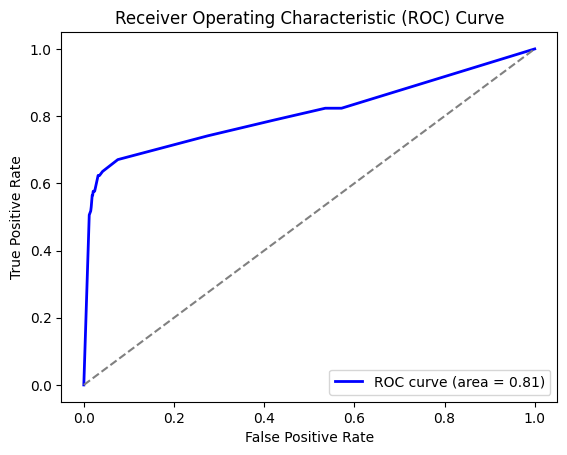

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize Decision Tree with chosen parameters (without GridSearchCV)
dtc = DecisionTreeClassifier(
    criterion='gini',       # Use 'gini' criterion
    max_depth=10,           # Set max_depth to 10
    min_samples_leaf=2,     # Set min_samples_leaf to 2
    min_samples_split=3     # Set min_samples_split to 3
)

# Train the model on the training data
dtc.fit(X_train, y_train)

# Predict on the test data
y_pre_dis = dtc.predict(X_test)
y_proba = dtc.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pre_dis)
f1 = f1_score(y_test, y_pre_dis)
precision = precision_score(y_test, y_pre_dis)
recall = recall_score(y_test, y_pre_dis)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.959
F1 Score: 0.6962962962962963
Precision: 0.94
Recall: 0.5529411764705883
ROC AUC: 0.9525040180006429


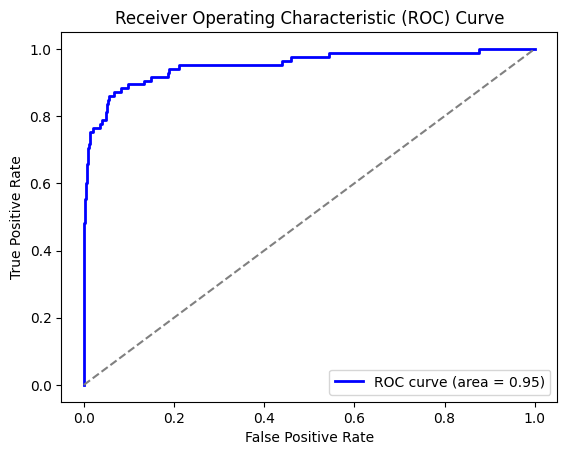

In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize XGBoost with chosen parameters (without GridSearchCV)
XGB_Classifier = XGBClassifier(
    eta=0.3,                   # Set eta (learning rate) to 0.2
    min_child_weight=2,        # Set min_child_weight to 2
    gamma=5,                   # Set gamma to 5
    subsample=0.8,             # Set subsample to 0.8
    colsample_bytree=0.8       # Set colsample_bytree to 0.8
)

# Train the model on the training data
XGB_Classifier.fit(X_train, y_train)

# Predict on the test data
y_pre_xgb = XGB_Classifier.predict(X_test)
y_proba_xgb = XGB_Classifier.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pre_xgb)
f1 = f1_score(y_test, y_pre_xgb)
precision = precision_score(y_test, y_pre_xgb)
recall = recall_score(y_test, y_pre_xgb)
roc_auc = roc_auc_score(y_test, y_proba_xgb)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.958
F1 Score: 0.676923076923077
Precision: 0.9777777777777777
Recall: 0.5176470588235295
ROC AUC: 0.9617164898746384


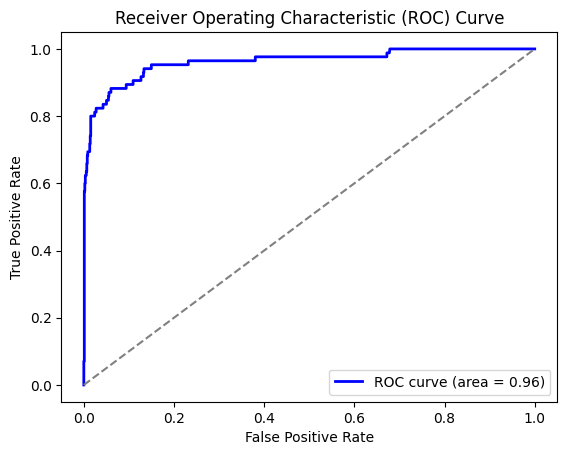

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize Random Forest with chosen parameters (without GridSearchCV)
rfc = RandomForestClassifier(
    n_estimators=400,       # Set number of trees to 500
    criterion='gini',       # Use 'gini' criterion
    max_features='sqrt',    # Use 'sqrt' for max features
    min_samples_leaf=2,     # Set min_samples_leaf to 2
    min_samples_split=5,    # Set min_samples_split to 5
    bootstrap=True          # Use bootstrap sampling
)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Predict on the test data
y_pre_rn = rfc.predict(X_test)
y_proba_rn = rfc.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pre_rn)
f1 = f1_score(y_test, y_pre_rn)
precision = precision_score(y_test, y_pre_rn)
recall = recall_score(y_test, y_pre_rn)
roc_auc = roc_auc_score(y_test, y_proba_rn)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rn)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.943
F1 Score: 0.6013986013986014
Precision: 0.7413793103448276
Recall: 0.5058823529411764
ROC AUC: 0.7797621343619414


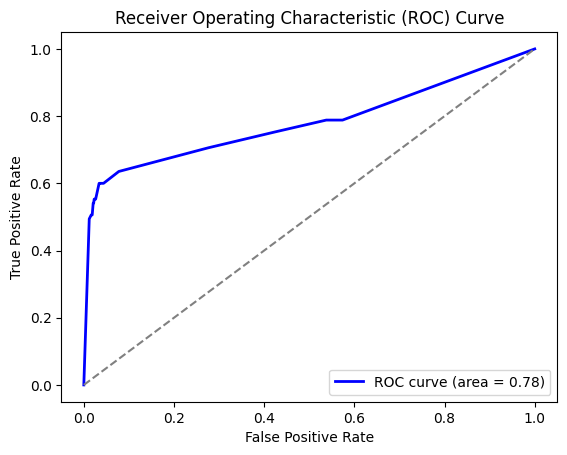

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize Decision Tree with chosen parameters (without GridSearchCV)
dtc = DecisionTreeClassifier(
    criterion='gini',       # Use 'gini' criterion
    max_depth=10,           # Set max_depth to 10
    min_samples_leaf=2,     # Set min_samples_leaf to 2
    min_samples_split=3     # Set min_samples_split to 3
)

# Train the model on the training data
dtc.fit(X_train, y_train)

# Predict on the test data
y_pre_dis = dtc.predict(X_test)
y_proba_dis = dtc.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pre_dis)
f1 = f1_score(y_test, y_pre_dis)
precision = precision_score(y_test, y_pre_dis)
recall = recall_score(y_test, y_pre_dis)
roc_auc = roc_auc_score(y_test, y_proba_dis)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_dis)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.97
F1 Score: 0.7887323943661971
Precision: 0.9824561403508771
Recall: 0.6588235294117647
ROC AUC: 0.9713275474124076


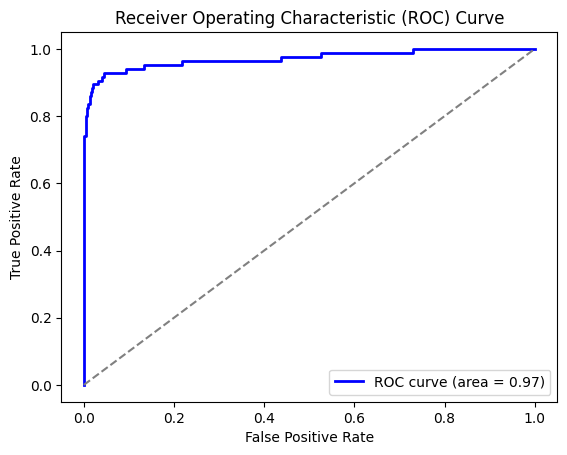

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize SVC with chosen parameters
support_vector_classifier = SVC(kernel='rbf', probability=True)  # Set probability=True for ROC AUC

# Train the model on the training data
support_vector_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = support_vector_classifier.predict(X_test)
y_proba = support_vector_classifier.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.96
F1 Score: 0.696969696969697
Precision: 0.9787234042553191
Recall: 0.5411764705882353
AUC Score: 0.9226229508196722
Confusion Matrix:
 [[914   1]
 [ 39  46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       915
           1       0.98      0.54      0.70        85

    accuracy                           0.96      1000
   macro avg       0.97      0.77      0.84      1000
weighted avg       0.96      0.96      0.95      1000



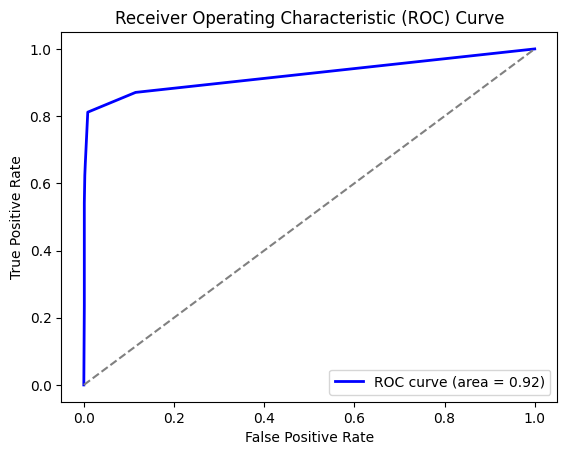

Train Accuracy: 0.96775


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Initialize KNN with the best K value
knn = KNeighborsClassifier(n_neighbors=9)

# Train the model on the training data
knn.fit(X_train, y_train)

# Predict on the test data
pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
auc_score_knn = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC Score: {auc_score_knn}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, pred))

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_score_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate train accuracy
pred_train = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, pred_train)
print(f"Train Accuracy: {train_accuracy}")


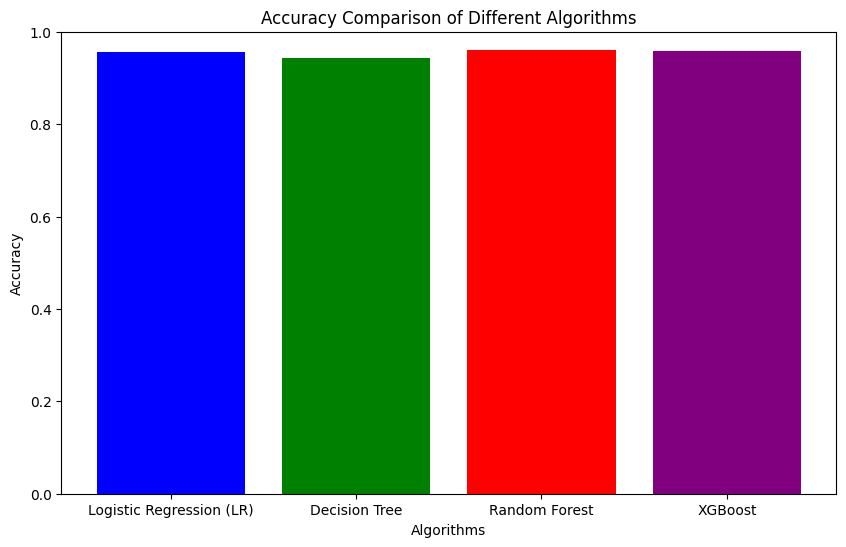

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores for each algorithm based on your variable names
accuracy_scores = {
   # 'KNN': accuracy_score(y_test, pred),
   # 'SVM': accuracy_score(y_test, y_pred),
   'Logistic Regression (LR)': accuracy_score(y_test,y_pre_log),
    'Decision Tree': accuracy_score(y_test, y_pre_dis),
    'Random Forest': accuracy_score(y_test, y_pre_rn),
    'XGBoost': accuracy_score(y_test, y_pre_xgb)
}

# Plotting the accuracies
algorithms = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Algorithms')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization
plt.show()


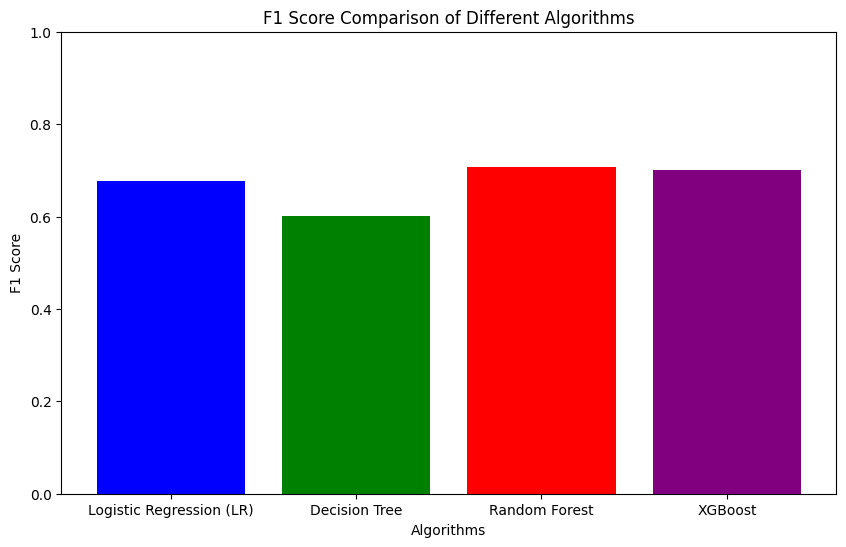

In [ ]:
import matplotlib.pyplot as plt

# F1 scores for each algorithm based on your variable names
f1_scores = {
  #  'KNN': f1_score(y_test, pred),
   # 'SVM': f1_score(y_test, y_pred),
   'Logistic Regression (LR)': f1_score(y_test,y_pre_log),
    'Decision Tree': f1_score(y_test, y_pre_dis),
    'Random Forest': f1_score(y_test, y_pre_rn),
    'XGBoost': f1_score(y_test, y_pre_xgb)
}

# Plotting the F1 scores
algorithms = list(f1_scores.keys())
f1_values = list(f1_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(algorithms, f1_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison of Different Algorithms')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization (assuming F1 score is between 0 and 1)
plt.show()


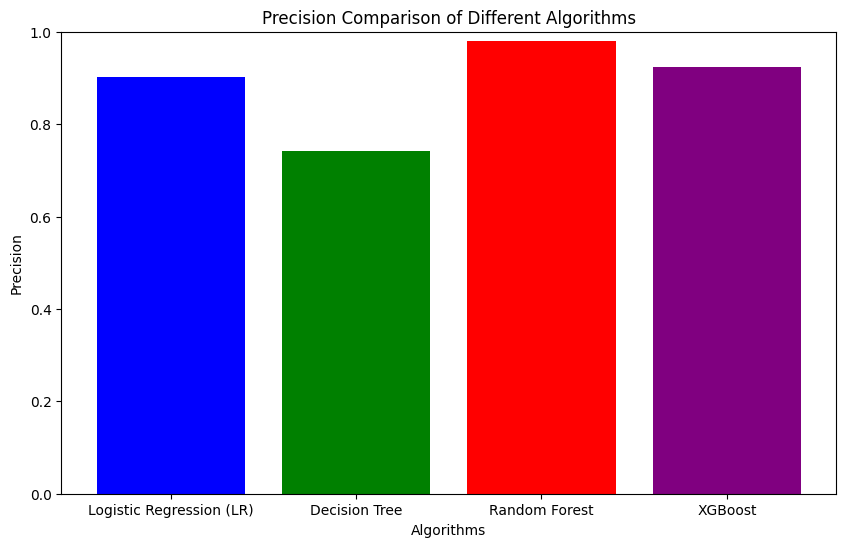

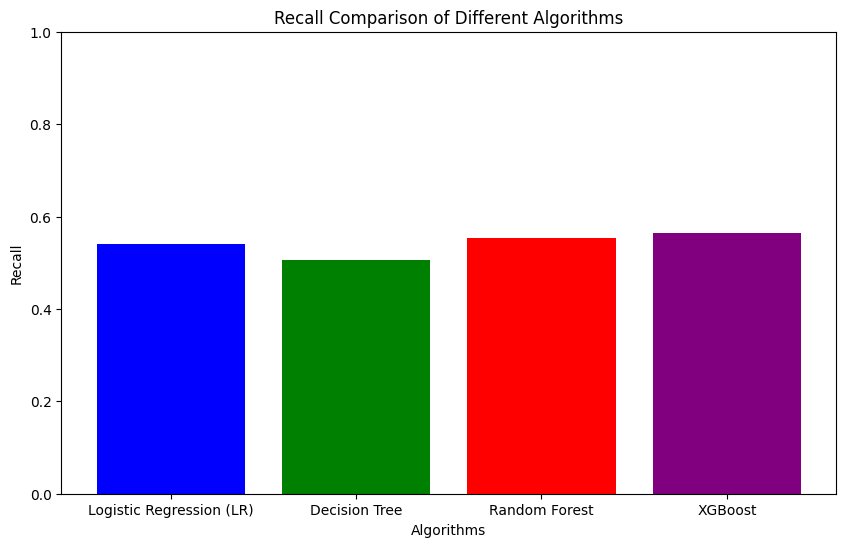

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Precision scores for each algorithm
precision_scores = {
  #  'KNN': precision_score(y_test, pred),
  #  'SVM': precision_score(y_test, y_pred),
   'Logistic Regression (LR)': precision_score(y_test,y_pre_log),
    'Decision Tree': precision_score(y_test, y_pre_dis),
    'Random Forest': precision_score(y_test, y_pre_rn),
    'XGBoost': precision_score(y_test, y_pre_xgb)
}

# Recall scores for each algorithm
recall_scores = {
    #'KNN': recall_score(y_test, pred),
   # 'SVM': recall_score(y_test, y_pred),
     'Logistic Regression (LR)': recall_score(y_test,y_pre_log),
    'Decision Tree': recall_score(y_test, y_pre_dis),
    'Random Forest': recall_score(y_test, y_pre_rn),
    'XGBoost': recall_score(y_test, y_pre_xgb)
}

# Plotting Precision scores
plt.figure(figsize=(10, 6))
plt.bar(precision_scores.keys(), precision_scores.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Algorithms')
plt.ylabel('Precision')
plt.title('Precision Comparison of Different Algorithms')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization
plt.show()

# Plotting Recall scores
plt.figure(figsize=(10, 6))
plt.bar(recall_scores.keys(), recall_scores.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Algorithms')
plt.ylabel('Recall')
plt.title('Recall Comparison of Different Algorithms')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization
plt.show()


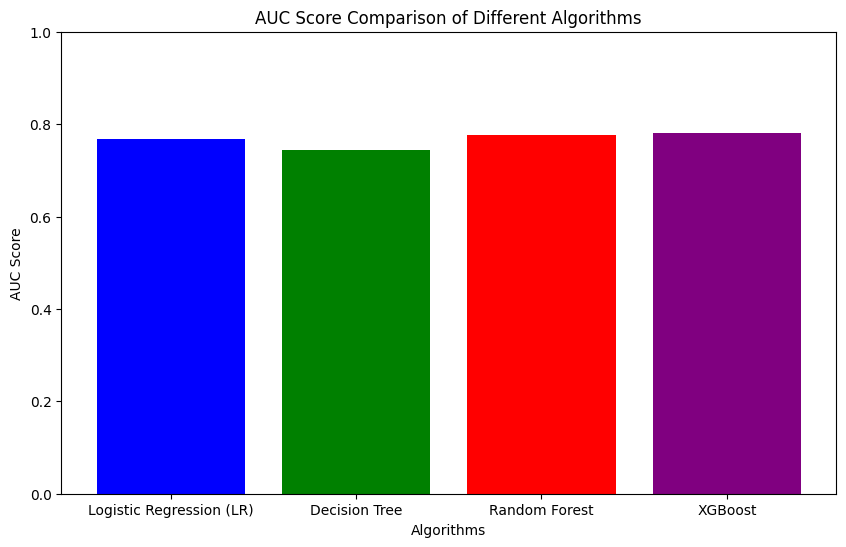

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# AUC scores for each algorithm based on your variable names
auc_scores = {
  #  'KNN': roc_auc_score(y_test, pred),  # Replace pred_prob with the predicted probabilities from your KNN model
  #  'SVM': roc_auc_score(y_test, y_pred),  # Replace y_pred_prob with the predicted probabilities from your SVM model
   'Logistic Regression (LR)': roc_auc_score(y_test,y_pre_log),
    'Decision Tree': roc_auc_score(y_test, y_pre_dis),  # Replace y_pre_dis_prob with decision tree probabilities
    'Random Forest': roc_auc_score(y_test, y_pre_rn),  # Replace y_pre_rn_prob with random forest probabilities
    'XGBoost': roc_auc_score(y_test, y_pre_xgb)  # Replace y_pre_xgb_prob with XGBoost probabilities
}

# Plotting the AUC scores
algorithms = list(auc_scores.keys())
auc_values = list(auc_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(algorithms, auc_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Algorithms')
plt.ylabel('AUC Score')
plt.title('AUC Score Comparison of Different Algorithms')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization (AUC is between 0 and 1)
plt.show()


**Notes:**
1. XGBOOST gives accuracy of 0.85 which is best amongst them
2. There is very less difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.88 which is really Good
4. XGBBOST is basically an implementation of GBDT Gradint Boosting Decision Tree
5. XGBOOST have given us the best result so far

# Feature Importance using XGBOOST

**Notes:**
1. XGBOOST gives us best results so find important feaures for it
2. As per the feature importance of XGBOOST it is clear that bank need to focus more on clients with success in previous campaign. Whether client uses cellular phone or not and the month in which client is being called play a vital role


# ROC Curve

**NOTES:**
1. Random Forest and XGBOOST has best AUC
2. Many of them have gives more or less same value of AUC


#RESAMPLING

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!pip install -U imbalanced-learn

Accuracy: 0.968
F1 Score: 0.7894736842105263
Precision: 0.8955223880597015
Recall: 0.7058823529411765
ROC AUC: 0.9658502089360333


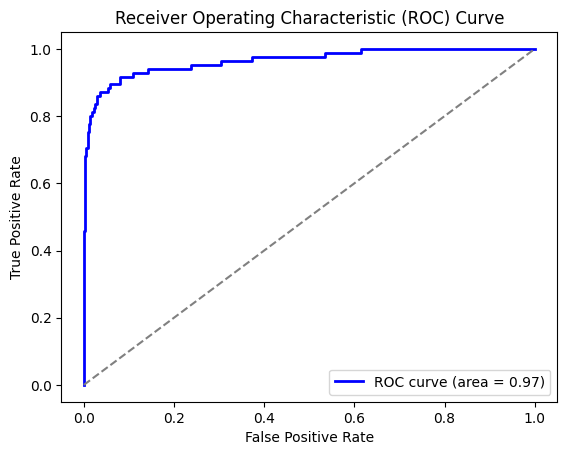

In [ ]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Apply SMOTE to balance the classes in the training set
smote = SMOTE(sampling_strategy=0.3, random_state=42)  # Further reduce the sampling strategy
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Step 2: Define parameter grid for RandomizedSearchCV with lower values
param_distributions = {
    'n_estimators': [100, 150, 200],  # Reduce the number of estimators further
    'max_depth': [3, 4, 5],  # Restrict tree depth even more
    'learning_rate': [0.01, 0.05, 0.1],  # Reduce learning rate to make the model less aggressive
    'min_child_weight': [1, 2],  # Lower min_child_weight
    'gamma': [0, 0.2],  # Reduce gamma to restrict tree growth
    'subsample': [0.7, 0.75],  # Further reduce subsample ratio
    'colsample_bytree': [0.7, 0.75]  # Further reduce feature sampling
}

# Step 3: Initialize XGBClassifier and RandomizedSearchCV
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=15,              # Reduce the number of iterations for RandomizedSearchCV
    scoring='f1',           # Optimize for F1-score
    cv=5,                   # 5-fold cross-validation
    random_state=42,
    n_jobs=-1               # Use all CPU cores
)

# Step 4: Fit RandomizedSearchCV to the SMOTE resampled data
random_search.fit(X_smote, y_smote)

# Step 5: Predict on the test data with the best model found by RandomizedSearchCV
best_xgb_model = random_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
y_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Step 6: Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb, average='binary')
precision = precision_score(y_test, y_pred_xgb, average='binary')
recall = recall_score(y_test, y_pred_xgb, average='binary')
roc_auc = roc_auc_score(y_test, y_proba_xgb)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")

# Step 7: Plot the ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train_encoded)

# Estimate scale_pos_weight based on class distribution in y_train
scale_pos_weight = y_train_encoded.tolist().count(0) / y_train_encoded.tolist().count(1)

# Define parameter grid for RandomizedSearchCV including scale_pos_weight
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 1, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'scale_pos_weight': [scale_pos_weight * 0.8, scale_pos_weight, scale_pos_weight * 1.2]  # Adjusted values
}

# Initialize XGBClassifier and RandomizedSearchCV
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='f1',           # Optimize for F1-score
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the SMOTE resampled data
random_search.fit(X_smote, y_smote)

# Get best model and predict on test data
best_xgb_model = random_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
y_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
f1 = f1_score(y_test_encoded, y_pred_xgb)
precision = precision_score(y_test_encoded, y_pred_xgb)
recall = recall_score(y_test_encoded, y_pred_xgb)
roc_auc = roc_auc_score(y_test_encoded, y_proba_xgb)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")

# Plot ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_proba_xgb)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from collections import Counter

In [ ]:
#ROS


ROS

In [ ]:
y_train.shape, y_test.shape

((4000,), (1000,))

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize RandomOverSampler
ros = RandomOverSampler()

# Perform Random Oversampling
X_ros, y_ros = ros.fit_resample(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Accuracy: 0.966
F1 Score: 0.7763157894736842
Precision: 0.8805970149253731
Recall: 0.6941176470588235
ROC AUC: 0.9632144005143041


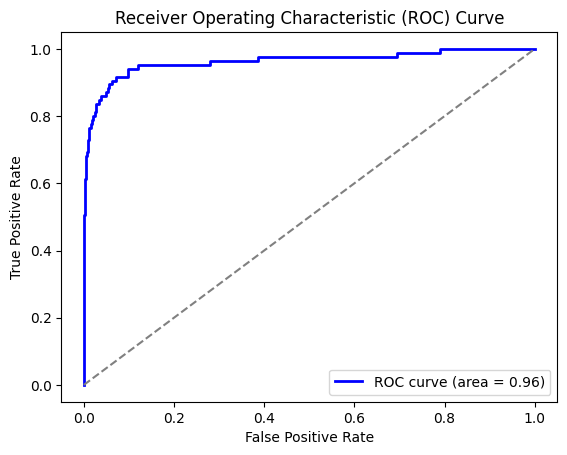

Best parameters found: {'subsample': 0.9, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

# Step 1: Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Step 2: Perform Random Oversampling
X_ros, y_ros = ros.fit_resample(X_train, y_train)

# Step 3: Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'max_depth': [3, 5, 7, 9]
}

# Step 4: Initialize XGBoost without predefined hyperparameters
XGB_Classifier = XGBClassifier()

# Step 5: Set up RandomizedSearchCV to search the parameter space
random_search = RandomizedSearchCV(
    estimator=XGB_Classifier,
    param_distributions=param_distributions,
    n_iter=10,               # Number of random combinations to try
    scoring='f1',            # Use F1 score for evaluation
    cv=10,                    # 5-fold cross-validation
    random_state=42,         # Ensure reproducibility
    verbose=1,               # Print progress
    n_jobs=-1                # Use all available CPU cores
)

# Step 6: Fit RandomizedSearchCV to the oversampled training data
random_search.fit(X_ros, y_ros)

# Step 7: Get the best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Step 8: Predict on the test data
y_pre_xgb_ros = best_model.predict(X_test)
y_proba_xgb_ros = best_model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Step 9: Calculate metrics
accuracy_ros = accuracy_score(y_test, y_pre_xgb_ros)
f1_ros = f1_score(y_test, y_pre_xgb_ros)
precision_ros = precision_score(y_test, y_pre_xgb_ros)
recall_ros = recall_score(y_test, y_pre_xgb_ros)
roc_auc_ros = roc_auc_score(y_test, y_proba_xgb_ros)

# Print metrics
print(f"Accuracy: {accuracy_ros}")
print(f"F1 Score: {f1_ros}")
print(f"Precision: {precision_ros}")
print(f"Recall: {recall_ros}")
print(f"ROC AUC: {roc_auc_ros}")

# Step 10: Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb_ros)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_ros:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Step 11: Print the best parameters found by RandomizedSearchCV
print("Best parameters found:", random_search.best_params_)


RUS

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize RandomUnderSampler
rus = RandomUnderSampler()

# Perform Random Undersampling
X_rus, y_rus = rus.fit_resample(X_train, y_train)




RUS

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Accuracy: 0.892
F1 Score: 0.5714285714285714
Precision: 0.4311377245508982
Recall: 0.8470588235294118
ROC AUC: 0.931468981035037


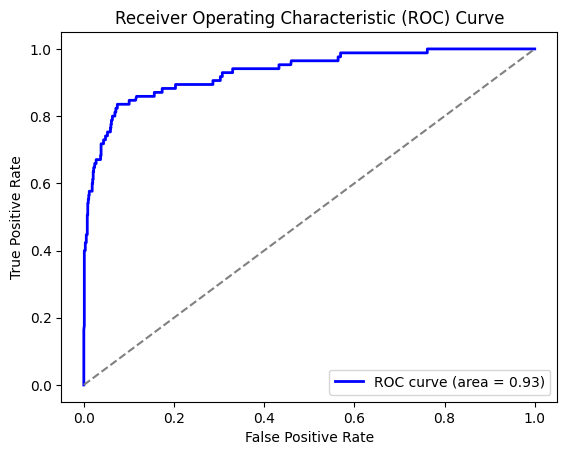

Best parameters found: {'subsample': 0.9, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.3, 'gamma': 5, 'colsample_bytree': 0.8}


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

# Step 1: Apply Random Under-Sampling (RUS)
rus = RandomUnderSampler(random_state=139)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Step 2: Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'max_depth': [3, 5, 7, 9]
}

# Step 3: Initialize XGBoost without predefined hyperparameters
XGB_Classifier = XGBClassifier()

# Step 4: Set up RandomizedSearchCV to search the parameter space
random_search = RandomizedSearchCV(
    estimator=XGB_Classifier,
    param_distributions=param_distributions,
    n_iter=10,               # Number of random combinations to try
    scoring='f1',            # Use F1 score for evaluation
    cv=10,                    # 5-fold cross-validation
    random_state=42,         # Ensure reproducibility
    verbose=1,               # Print progress
    n_jobs=-1                # Use all available CPU cores
)

# Step 5: Fit RandomizedSearchCV to the RUS-resampled training data
random_search.fit(X_train_rus, y_train_rus)

# Step 6: Get the best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Step 7: Predict on the test data
y_pre_xgb_rus = best_model.predict(X_test)
y_proba_xgb_rus = best_model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Step 8: Calculate metrics
accuracy_rus = accuracy_score(y_test, y_pre_xgb_rus)
f1_rus = f1_score(y_test, y_pre_xgb_rus)
precision_rus = precision_score(y_test, y_pre_xgb_rus)
recall_rus = recall_score(y_test, y_pre_xgb_rus)
roc_auc_rus = roc_auc_score(y_test, y_proba_xgb_rus)

# Print metrics
print(f"Accuracy: {accuracy_rus}")
print(f"F1 Score: {f1_rus}")
print(f"Precision: {precision_rus}")
print(f"Recall: {recall_rus}")
print(f"ROC AUC: {roc_auc_rus}")

# Step 9: Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb_rus)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rus:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Step 10: Print the best parameters found by RandomizedSearchCV
print("Best parameters found:", random_search.best_params_)


ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=42)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 3661, 1: 339})
After Counter({0: 3661, 1: 3642})


Before: Counter({0: 3661, 1: 339})
After: Counter({0: 3661, 1: 3642})
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters found: {'subsample': 0.9, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Accuracy: 0.964
F1 Score: 0.7857142857142857
Precision: 0.7951807228915663
Recall: 0.7764705882352941
ROC AUC: 0.9672774027643845


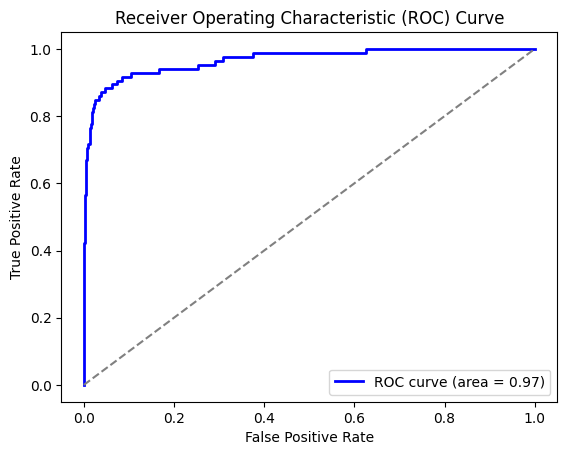

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from collections import Counter
import matplotlib.pyplot as plt

# Display class distribution before oversampling
counter = Counter(y_train)
print('Before:', counter)

# Apply ADASYN to balance the classes
ada = ADASYN(random_state=42)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

# Display class distribution after ADASYN
counter = Counter(y_train_ada)
print('After:', counter)

# Define parameter grid for RandomizedSearchCV
param_distributions = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'max_depth': [3, 5, 7, 9]
}

# Initialize XGBoost with GPU support
XGB_Classifier = XGBClassifier(
   # tree_method='gpu_hist',   # Use GPU for training
   # predictor='gpu_predictor' # Use GPU for predictions
)

# Use RandomizedSearchCV with ADASYN-resampled data to find best parameters
random_search = RandomizedSearchCV(
    estimator=XGB_Classifier,
    param_distributions=param_distributions,
    n_iter=10,                 # Number of random combinations to try
    scoring='f1',              # Optimize for F1 score
    cv=10,                      # 3-fold cross-validation
    random_state=42,
    verbose=1,
    n_jobs=-1                  # Use all available cores
)

# Fit the model with RandomizedSearchCV on ADASYN-resampled data
random_search.fit(X_train_ada, y_train_ada)
best_model = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)

# Predict on the test data using the best model
y_pre_xgb_ada = best_model.predict(X_test)
y_proba_xgb_ada = best_model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
accuracy_ada = accuracy_score(y_test, y_pre_xgb_ada)
f1_ada = f1_score(y_test, y_pre_xgb_ada)
precision_ada = precision_score(y_test, y_pre_xgb_ada)
recall_ada = recall_score(y_test, y_pre_xgb_ada)
roc_auc_ada = roc_auc_score(y_test, y_proba_xgb_ada)

print(f"Accuracy: {accuracy_ada}")
print(f"F1 Score: {f1_ada}")
print(f"Precision: {precision_ada}")
print(f"Recall: {recall_ada}")
print(f"ROC AUC: {roc_auc_ada}")

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb_ada)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_ada:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


SMOTE+ENN

In [ ]:

from imblearn.combine import SMOTEENN
from collections import Counter

# Display class distribution before sampling
counter = Counter(y_train)
print('Before', counter)

# Hybrid of SMOTE-NC and RUS using SMOTEENN
smoteenn = SMOTEENN(random_state=139)
X_train_smenn, y_train_smenn = smoteenn.fit_resample(X_train, y_train)

# Display class distribution after sampling
counter = Counter(y_train_smenn)
print('After', counter)


Before Counter({0: 3661, 1: 339})
After Counter({1: 3640, 0: 3368})


Before: Counter({0: 3661, 1: 339})
After: Counter({1: 3640, 0: 3368})
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters found: {'subsample': 0.9, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Accuracy: 0.967
F1 Score: 0.8114285714285714
Precision: 0.7888888888888889
Recall: 0.8352941176470589
ROC AUC: 0.9678045644487303


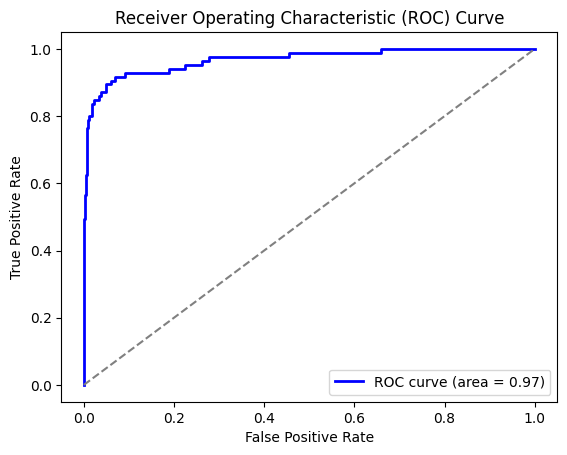

In [ ]:
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Display class distribution before sampling
counter = Counter(y_train)
print('Before:', counter)

# Apply SMOTEENN for hybrid resampling
smoteenn = SMOTEENN(random_state=139)
X_train_smenn, y_train_smenn = smoteenn.fit_resample(X_train, y_train)

# Display class distribution after SMOTEENN
counter = Counter(y_train_smenn)
print('After:', counter)

# Define parameter grid for RandomizedSearchCV
param_distributions = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'max_depth': [3, 5, 7, 9]
}

# Initialize XGBoost with GPU support
XGB_Classifier = XGBClassifier(
  #  tree_method='gpu_hist',    # Use GPU for training
   # predictor='gpu_predictor'  # Use GPU for predictions
)

# Set up RandomizedSearchCV to optimize F1 score
random_search = RandomizedSearchCV(
    estimator=XGB_Classifier,
    param_distributions=param_distributions,
    n_iter=10,                 # Number of random combinations to try
    scoring='f1',              # Optimize for F1 score
    cv=10,                      # 3-fold cross-validation
    random_state=42,
    verbose=1,
    n_jobs=-1                  # Use all available cores
)

# Fit RandomizedSearchCV with SMOTEENN-resampled data
random_search.fit(X_train_smenn, y_train_smenn)
best_model = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)

# Predict on the test data using the best model
y_pre_xgb_smenn = best_model.predict(X_test)
y_proba_xgb_smenn = best_model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
accuracy_smenn = accuracy_score(y_test, y_pre_xgb_smenn)
f1_smenn = f1_score(y_test, y_pre_xgb_smenn)
precision_smenn = precision_score(y_test, y_pre_xgb_smenn)
recall_smenn = recall_score(y_test, y_pre_xgb_smenn)
roc_auc_smenn = roc_auc_score(y_test, y_proba_xgb_smenn)

print(f"Accuracy: {accuracy_smenn}")
print(f"F1 Score: {f1_smenn}")
print(f"Precision: {precision_smenn}")
print(f"Recall: {recall_smenn}")
print(f"ROC AUC: {roc_auc_smenn}")

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb_smenn)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_smenn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


SMOTE+TOMEK Links

In [ ]:
from imblearn.combine import SMOTETomek

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 3661, 1: 339})
After Counter({0: 3661, 1: 3661})


Before: Counter({0: 3661, 1: 339})
After: Counter({0: 3661, 1: 3661})
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters found: {'subsample': 0.9, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Accuracy: 0.969
F1 Score: 0.8074534161490683
Precision: 0.8552631578947368
Recall: 0.7647058823529411
ROC AUC: 0.9663387978142076


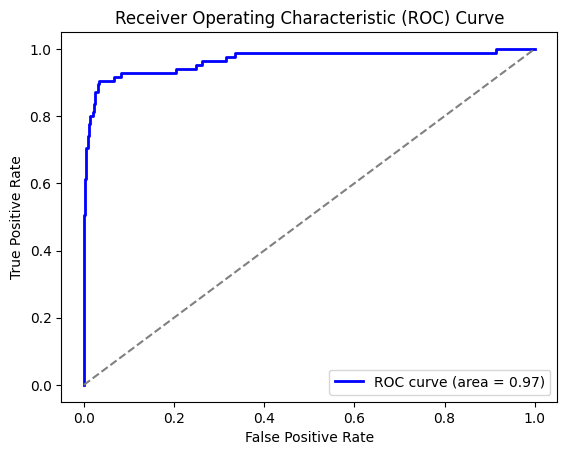

In [ ]:
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Display class distribution before SMOTETomek resampling
counter = Counter(y_train)
print('Before:', counter)

# Apply SMOTETomek for hybrid resampling
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

# Display class distribution after SMOTETomek
counter = Counter(y_train_smtom)
print('After:', counter)

# Define parameter grid for RandomizedSearchCV
param_distributions = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'max_depth': [3, 5, 7, 9]
}

# Initialize XGBoost with GPU support
XGB_Classifier = XGBClassifier(
  #  tree_method='gpu_hist',    # Use GPU for training
   # predictor='gpu_predictor'  # Use GPU for predictions
)

# Set up RandomizedSearchCV to optimize F1 score
random_search = RandomizedSearchCV(
    estimator=XGB_Classifier,
    param_distributions=param_distributions,
    n_iter=10,                 # Number of random combinations to try
    scoring='f1',              # Optimize for F1 score
    cv=10,                      # 3-fold cross-validation
    random_state=42,
    verbose=1,
    n_jobs=-1                  # Use all available cores
)

# Fit RandomizedSearchCV with SMOTETomek-resampled data
random_search.fit(X_train_smtom, y_train_smtom)
best_model = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)

# Predict on the test data using the best model
y_pre_xgb_smtom = best_model.predict(X_test)
y_proba_xgb_smtom = best_model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
accuracy_smtom = accuracy_score(y_test, y_pre_xgb_smtom)
f1_smtom = f1_score(y_test, y_pre_xgb_smtom)
precision_smtom = precision_score(y_test, y_pre_xgb_smtom)
recall_smtom = recall_score(y_test, y_pre_xgb_smtom)
roc_auc_smtom = roc_auc_score(y_test, y_proba_xgb_smtom)

print(f"Accuracy: {accuracy_smtom}")
print(f"F1 Score: {f1_smtom}")
print(f"Precision: {precision_smtom}")
print(f"Recall: {recall_smtom}")
print(f"ROC AUC: {roc_auc_smtom}")

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb_smtom)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_smtom:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


SMOTE+NC+RUS

In [ ]:
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Display class distribution before sampling
counter = Counter(y_train)
print('Before', counter)

# Step 1: Apply SMOTE-NC (works on both continuous and categorical features)
smotenc = SMOTENC(categorical_features=[0, 1], random_state=139)  # Example: assume columns 0 and 1 are categorical
X_train_smotenc, y_train_smotenc = smotenc.fit_resample(X_train, y_train)

# Step 2: Apply Random Under-Sampling (RUS) on the resampled data from SMOTE-NC
rus = RandomUnderSampler(random_state=139)
X_train_smotenc_rus, y_train_smotenc_rus = rus.fit_resample(X_train_smotenc, y_train_smotenc)

# Display class distribution after sampling
counter = Counter(y_train_smotenc_rus)
print('After', counter)


Before Counter({0: 3661, 1: 339})
After Counter({0: 3661, 1: 3661})


Before: Counter({0: 3661, 1: 339})
After: Counter({0: 3661, 1: 3661})
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters found: {'subsample': 0.9, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Accuracy: 0.969
F1 Score: 0.8165680473372781
Precision: 0.8214285714285714
Recall: 0.8117647058823529
ROC AUC: 0.9713146898103504


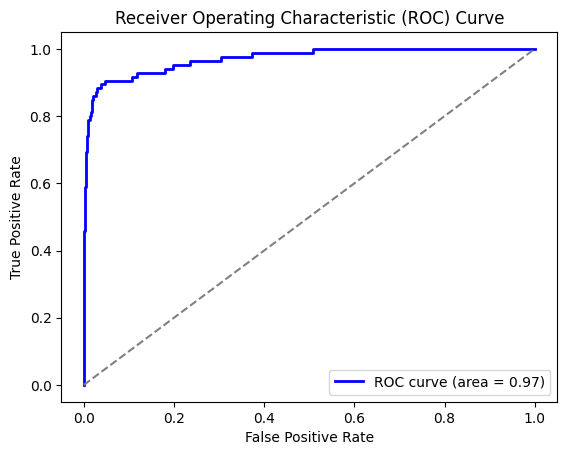

In [ ]:
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Display class distribution before sampling
counter = Counter(y_train)
print('Before:', counter)

# Step 1: Apply SMOTENC (assume columns 0 and 1 are categorical)
smotenc = SMOTENC(categorical_features=[0, 1], random_state=139)
X_train_smotenc, y_train_smotenc = smotenc.fit_resample(X_train, y_train)

# Step 2: Apply Random Under-Sampling on SMOTENC-resampled data
rus = RandomUnderSampler(random_state=139)
X_train_smotenc_rus, y_train_smotenc_rus = rus.fit_resample(X_train_smotenc, y_train_smotenc)

# Display class distribution after SMOTENC + RUS
counter = Counter(y_train_smotenc_rus)
print('After:', counter)

# Define parameter grid for RandomizedSearchCV
param_distributions = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'max_depth': [3, 5, 7, 9]
}

# Initialize XGBoost with GPU support
XGB_Classifier = XGBClassifier(
  #  tree_method='gpu_hist',
   # predictor='gpu_predictor'
)

# Set up RandomizedSearchCV to optimize F1 score
random_search = RandomizedSearchCV(
    estimator=XGB_Classifier,
    param_distributions=param_distributions,
    n_iter=10,
    scoring='f1',
    cv=10,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit RandomizedSearchCV with SMOTENC + RUS data
random_search.fit(X_train_smotenc_rus, y_train_smotenc_rus)
best_model = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)

# Predict on the test data using the best model
y_pre_xgb_smotenc_rus = best_model.predict(X_test)
y_proba_xgb_smotenc_rus = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_smotenc_rus = accuracy_score(y_test, y_pre_xgb_smotenc_rus)
f1_smotenc_rus = f1_score(y_test, y_pre_xgb_smotenc_rus)
precision_smotenc_rus = precision_score(y_test, y_pre_xgb_smotenc_rus)
recall_smotenc_rus = recall_score(y_test, y_pre_xgb_smotenc_rus)
roc_auc_smotenc_rus = roc_auc_score(y_test, y_proba_xgb_smotenc_rus)

print(f"Accuracy: {accuracy_smotenc_rus}")
print(f"F1 Score: {f1_smotenc_rus}")
print(f"Precision: {precision_smotenc_rus}")
print(f"Recall: {recall_smotenc_rus}")
print(f"ROC AUC: {roc_auc_smotenc_rus}")

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb_smotenc_rus)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_smotenc_rus:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


SMOTE+NC

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Accuracy: 0.962
F1 Score: 0.7361111111111112
Precision: 0.8983050847457628
Recall: 0.6235294117647059
ROC AUC: 0.9634201221472195


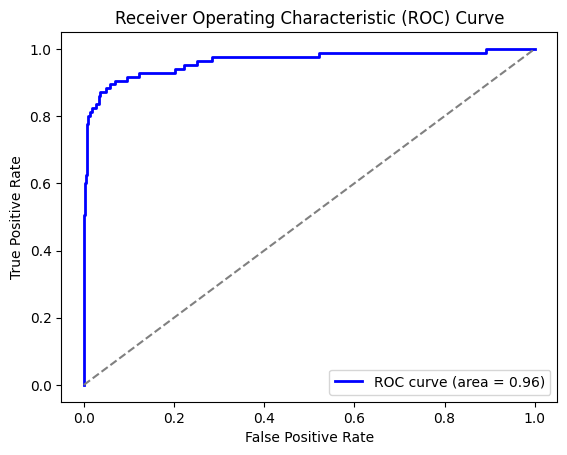

Best parameters found: {'subsample': 0.9, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

# Define parameter grid for RandomizedSearchCV
param_distributions = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'max_depth': [3, 5, 7, 9]
}

# Initialize XGBoost without predefined hyperparameters
XGB_Classifier = XGBClassifier()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=XGB_Classifier,
    param_distributions=param_distributions,
    n_iter=10,               # Number of random combinations to try
    scoring='f1',            # Use F1 score for evaluation
    cv=10,                    # 5-fold cross-validation
    random_state=42,         # Ensure reproducibility
    verbose=1,               # Print progress
    n_jobs=-1                # Use all available CPU cores
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Predict on the test data
y_pre_xgb = best_model.predict(X_test)
y_proba_xgb = best_model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
accuracy_xgb = accuracy_score(y_test, y_pre_xgb)
f1_xgb = f1_score(y_test, y_pre_xgb)
precision_xgb = precision_score(y_test, y_pre_xgb)
recall_xgb = recall_score(y_test, y_pre_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)

# Print metrics
print(f"Accuracy: {accuracy_xgb}")
print(f"F1 Score: {f1_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"ROC AUC: {roc_auc_xgb}")

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print the best parameters found by RandomizedSearchCV
print("Best parameters found:", random_search.best_params_)


In [ ]:
# Install the necessary libraries
!pip install imbalanced-learn xgboost ctgan torch



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from ctgan import CTGAN

ctgan = CTGAN(epochs=200)  # Adjust epochs as needed
ctgan.fit(X_train)

# Generate synthetic samples equal to the minority class size
X_synthetic = ctgan.sample(len(y_train[y_train == 1]))  # Adjust to match the minority class size
y_synthetic = pd.Series([1] * len(X_synthetic))  # Label as minority class


# Convert X_train and X_synthetic to DataFrames before concatenation
X_train_df = pd.DataFrame(X_train)
X_synthetic_df = pd.DataFrame(X_synthetic)

# Combine synthetic samples with original data
X_ctgan = pd.concat([X_train_df, X_synthetic_df])

# Convert y_train to a Pandas Series before concatenation
y_train_series = pd.Series(y_train)  # Convert y_train to Series
y_ctgan = pd.concat([y_train_series, y_synthetic]) # Concatenate Series

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

def train_xgboost(X_train, y_train, X_test, y_test):
    model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=4, scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    }

# Example training with ROS data

results_ctgan = train_xgboost(X_ctgan, y_ctgan, X_test, y_test)


print("CTGAN Results:", results_ctgan)


CTGAN Results: {'Accuracy': 0.97, 'F1 Score': 0.8125, 'ROC AUC': 0.8768884603021536, 'Precision': 0.8666666666666667, 'Recall': 0.7647058823529411}


In [ ]:
import pandas as pd
from ctgan import CTGAN
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply SMOTE before using CTGAN for better synthetic minority samples
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train CTGAN with tuned parameters on the minority class samples
ctgan = CTGAN(epochs=1000, batch_size=50, pac=5, generator_dim=(128, 128), discriminator_dim=(128, 128))
ctgan.fit(X_train_resampled[y_train_resampled == 1])

# Generate synthetic minority samples
X_synthetic = ctgan.sample(len(y_train_resampled[y_train_resampled == 1]))
y_synthetic = pd.Series([1] * len(X_synthetic))

# Combine synthetic samples with the original dataset
X_ctgan = pd.concat([pd.DataFrame(X_train_resampled), pd.DataFrame(X_synthetic)])
y_ctgan = pd.concat([pd.Series(y_train_resampled), y_synthetic])

# Define the tuned XGBoost model
def train_xgboost(X_train, y_train, X_test, y_test):
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        n_estimators=300,
        max_depth=4,
        min_child_weight=3,
        learning_rate=0.01,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred)
    }

# Scale the test set
X_test_scaled = scaler.transform(X_test)
results_ctgan = train_xgboost(X_ctgan, y_ctgan, X_test_scaled, y_test)

print("CTGAN + XGBoost Results:", results_ctgan)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from ctgan import CTGAN

# Assuming X_train and y_train are available as your training data
# Standardize the features for better model stability
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Scale the test data

# Convert scaled data to DataFrame with named columns for CTGAN compatibility
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=[f'feature_{i}' for i in range(X_train_scaled.shape[1])])

# Generate synthetic samples using CTGAN for the minority class
# Set pac=1 to avoid the assertion error
ctgan = CTGAN(epochs=300, batch_size=32, generator_lr=2e-4, discriminator_lr=2e-4, pac=1)

ctgan.fit(X_train_scaled_df)
X_synthetic = ctgan.sample(len(y_train[y_train == 1]))
y_synthetic = pd.Series([1] * len(X_synthetic))  # Label synthetic samples as minority class

# Combine original and synthetic data
X_combined = pd.concat([X_train_scaled_df, pd.DataFrame(X_synthetic)], ignore_index=True)
y_combined = pd.concat([pd.Series(y_train).reset_index(drop=True), y_synthetic], ignore_index=True)

# Optionally, apply SMOTE to refine the dataset balance
smote = SMOTE(sampling_strategy=0.5)  # Adjust to a balanced or nearly balanced ratio
X_resampled, y_resampled = smote.fit_resample(X_combined, y_combined)

# Define and train the XGBoost model
def train_xgboost(X_train, y_train, X_test, y_test):
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        n_estimators=200,
        max_depth=6,
        scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
        learning_rate=0.05,
        colsample_bytree=0.8,
        subsample=0.8
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Generate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return {
        "Accuracy": accuracy,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Classification Report": report
    }

# Evaluate the model on the test set
results_ctgan = train_xgboost(X_resampled, y_resampled, X_test_scaled, y_test)

# Print results
print("CTGAN + SMOTE + XGBoost Results:")

print("CTGAN + SMOTE + XGBoost Results:")
print("Accuracy:", results_ctgan["Accuracy"])
print("F1 Score:", results_ctgan["F1 Score"])
print("ROC AUC:", results_ctgan["ROC AUC"])
print("Classification Report:\n", results_ctgan["Classification Report"])

In [ ]:
!pip install torch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Parameters
latent_dim = 100  # Latent space dimension
class_dim = 1  # Dimension for class label (binary here)

# Define the Generator
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim + class_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Sigmoid()
        )

    def forward(self, z, labels):
        # Concatenate noise and label
        gen_input = torch.cat((z, labels), -1)
        return self.model(gen_input)

# Define the Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim + class_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x, labels):
        # Concatenate input and label
        disc_input = torch.cat((x, labels), -1)
        return self.model(disc_input)

# Initialize Generator and Discriminator
gen = Generator(latent_dim, X_train.shape[1])
disc = Discriminator(X_train.shape[1])
device = 'cuda' if torch.cuda.is_available() else 'cpu'
gen, disc = gen.to(device), disc.to(device)


In [ ]:
# Loss and Optimizers
adversarial_loss = nn.BCELoss()
optimizer_G = optim.Adam(gen.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(disc.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Convert the dataset to tensors for PyTorch
# Extract values from DataFrame before converting to tensor
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1).to(device)
# Converted y_train to NumPy array using .values

# DataLoader
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# ... (rest of the code remains the same)

# ... (rest of the code remains the same)
# Training
n_epochs = 100  # Adjust epochs as needed
for epoch in range(n_epochs):
    for i, (real_samples, labels) in enumerate(train_loader):
        batch_size = real_samples.size(0)

        # Adversarial ground truths
        valid = torch.ones((batch_size, 1), requires_grad=False).to(device)
        fake = torch.zeros((batch_size, 1), requires_grad=False).to(device)

        # ---------------------
        #  Train Generator
        # ---------------------
        optimizer_G.zero_grad()

        # Generate noise and class labels
        z = torch.randn(batch_size, latent_dim).to(device)
        gen_labels = labels

        # Generate a batch of synthetic samples
        gen_samples = gen(z, gen_labels)
        validity = disc(gen_samples, gen_labels)
        g_loss = adversarial_loss(validity, valid)

        g_loss.backward()
        optimizer_G.step()

        # ---------------------
        #  Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()

        # Real samples loss
        real_validity = disc(real_samples, labels)
        d_real_loss = adversarial_loss(real_validity, valid)

        # Fake samples loss
        fake_validity = disc(gen_samples.detach(), gen_labels)
        d_fake_loss = adversarial_loss(fake_validity, fake)

        # Total discriminator loss
        d_loss = (d_real_loss + d_fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

    # Print progress

        print(f"Epoch [{epoch}/{n_epochs}] | D Loss: {d_loss.item()} | G Loss: {g_loss.item()}")

print("CGAN training finished!")


In [ ]:
# Number of synthetic samples to generate
n_synthetic_samples = len(y_train[y_train == 1])  # Match the minority class count

# Generate synthetic samples
z = torch.randn(n_synthetic_samples, latent_dim).to(device)
labels = torch.ones((n_synthetic_samples, 1)).to(device)  # Condition on minority class (label = 1)
synthetic_samples = gen(z, labels).detach().cpu().numpy()

# Combine synthetic samples with original data
X_augmented = np.vstack((X_train, synthetic_samples))
y_augmented = np.hstack((y_train, np.ones(n_synthetic_samples)))

print("Synthetic minority samples generated and added to the dataset!")


In [ ]:
import xgboost as xgb
from sklearn.metrics import f1_score

model = xgb.XGBClassifier(objective='binary:logistic')
model.fit(X_augmented, y_augmented)

# Evaluate on test data
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("F1 Score on original test set:", f1)
